In [65]:
import requests
import json
from IPython.display import display
from PIL import Image

In [27]:
def get_api_response(url, params={}):
    res = requests.get(url=url, params=params)
    return json.loads(res.text)

In [3]:
flickr_base_url = 'https://www.flickr.com/services/rest/'

the flickr apis needed for this project requires api_key, to get your own api_key, you need to signup at flickr and request for an api_key. i have my own api_key. while sharing this notebook on github, i'm replacing my private api_key with a mock value of 'abc123'. To use this notebook, you need to assign your private api_key to the below variable

In [58]:
api_key = 'abc123'

We will be using two api methods for getting the images, the first method is 'flickr.photos.search', with the aid of this api we can get the list of images (which have photo id) related to our search criteria.
each image will have a photo id. The next api method that we will be using is 'flickr.photos.getSizes'. we need to pass the photo id to this api (which we had recieved from the previous api) and this will return the urls of the image in different sizes, once we have the urls of the images, we can download directly in our local machine. The api_key is required for both the api methods.

Now let us call these 2 api methods, in order to understand the response stucture

In [34]:
params = {'api_key':api_key, 'method':'flickr.photos.search', 'tags':'earthquake, damage, building', 'tag_mode':'all', 'sort':'relevance', 'media':'photos', 'page':1, 'per_page':10, 'format':'json', 'nojsoncallback':1}

In [36]:
data = get_api_response(flickr_base_url, params)

In [37]:
data

{'photos': {'page': 1,
  'pages': 181,
  'perpage': 10,
  'total': '1801',
  'photo': [{'id': '46562443505',
    'owner': '99526683@N00',
    'secret': '91b207db25',
    'server': '7896',
    'farm': 8,
    'title': 'The Vic and Whale pub facade Christchurch Central South Island New Zealand',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0},
   {'id': '46742194384',
    'owner': '99526683@N00',
    'secret': '957c0be4db',
    'server': '7802',
    'farm': 8,
    'title': 'Christchurch Tramway Oxford Tce South Island New Zealand',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0},
   {'id': '46628261302',
    'owner': '82428880@N00',
    'secret': '07c0f5403c',
    'server': '7860',
    'farm': 8,
    'title': 'Inui Yagura',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0},
   {'id': '39667862713',
    'owner': '125515135@N08',
    'secret': 'cecea1bdf4',
    'server': '7859',
    'farm': 8,
    'title': 'Durbar Square in latipur Nepal',
    'ispublic': 1,
    'is

In [30]:
data['photos']['total']

'1800'

In [38]:
data['photos']['photo']

[{'id': '46562443505',
  'owner': '99526683@N00',
  'secret': '91b207db25',
  'server': '7896',
  'farm': 8,
  'title': 'The Vic and Whale pub facade Christchurch Central South Island New Zealand',
  'ispublic': 1,
  'isfriend': 0,
  'isfamily': 0},
 {'id': '46742194384',
  'owner': '99526683@N00',
  'secret': '957c0be4db',
  'server': '7802',
  'farm': 8,
  'title': 'Christchurch Tramway Oxford Tce South Island New Zealand',
  'ispublic': 1,
  'isfriend': 0,
  'isfamily': 0},
 {'id': '46628261302',
  'owner': '82428880@N00',
  'secret': '07c0f5403c',
  'server': '7860',
  'farm': 8,
  'title': 'Inui Yagura',
  'ispublic': 1,
  'isfriend': 0,
  'isfamily': 0},
 {'id': '39667862713',
  'owner': '125515135@N08',
  'secret': 'cecea1bdf4',
  'server': '7859',
  'farm': 8,
  'title': 'Durbar Square in latipur Nepal',
  'ispublic': 1,
  'isfriend': 0,
  'isfamily': 0},
 {'id': '42963153720',
  'owner': '139732419@N05',
  'secret': '4a5e940686',
  'server': '1865',
  'farm': 2,
  'title': 'CO

In [52]:
sample_photo_id = data['photos']['photo'][1]['id']

In [53]:
sample_photo_id

'46742194384'

In [54]:
params2 = {'api_key':api_key, 'photo_id': sample_photo_id, 'method':'flickr.photos.getSizes','format':'json', 'nojsoncallback':1}

In [55]:
data2 = get_api_response(flickr_base_url, params2)

In [56]:
data2

{'sizes': {'canblog': 0,
  'canprint': 0,
  'candownload': 0,
  'size': [{'label': 'Square',
    'width': 75,
    'height': 75,
    'source': 'https://live.staticflickr.com/7802/46742194384_957c0be4db_s.jpg',
    'url': 'https://www.flickr.com/photos/naumov/46742194384/sizes/sq/',
    'media': 'photo'},
   {'label': 'Large Square',
    'width': '150',
    'height': '150',
    'source': 'https://live.staticflickr.com/7802/46742194384_957c0be4db_q.jpg',
    'url': 'https://www.flickr.com/photos/naumov/46742194384/sizes/q/',
    'media': 'photo'},
   {'label': 'Thumbnail',
    'width': '65',
    'height': '100',
    'source': 'https://live.staticflickr.com/7802/46742194384_957c0be4db_t.jpg',
    'url': 'https://www.flickr.com/photos/naumov/46742194384/sizes/t/',
    'media': 'photo'},
   {'label': 'Small',
    'width': '156',
    'height': '240',
    'source': 'https://live.staticflickr.com/7802/46742194384_957c0be4db_m.jpg',
    'url': 'https://www.flickr.com/photos/naumov/46742194384/si

For a particular 'photo_id', the api will return a response which will have the urls of image in different sizes, we can download the image of appropriate size based on our requirement, we will be downloading the 'Medium' sized images

Since, now we know the response structure of the 2 apis, now we can write functions to automate the download process of the images based on our requirement

Before proceeding, let us just once check whether we are able to save the image in our local machine

In [60]:
sample_img = requests.get('https://live.staticflickr.com/7802/46742194384_957c0be4db_b.jpg')

In [62]:
with open('46742194384_957c0be4db_b.jpg', 'wb') as img_file:
    img_file.write(sample_img.content)

Now let us display the image that we have saved

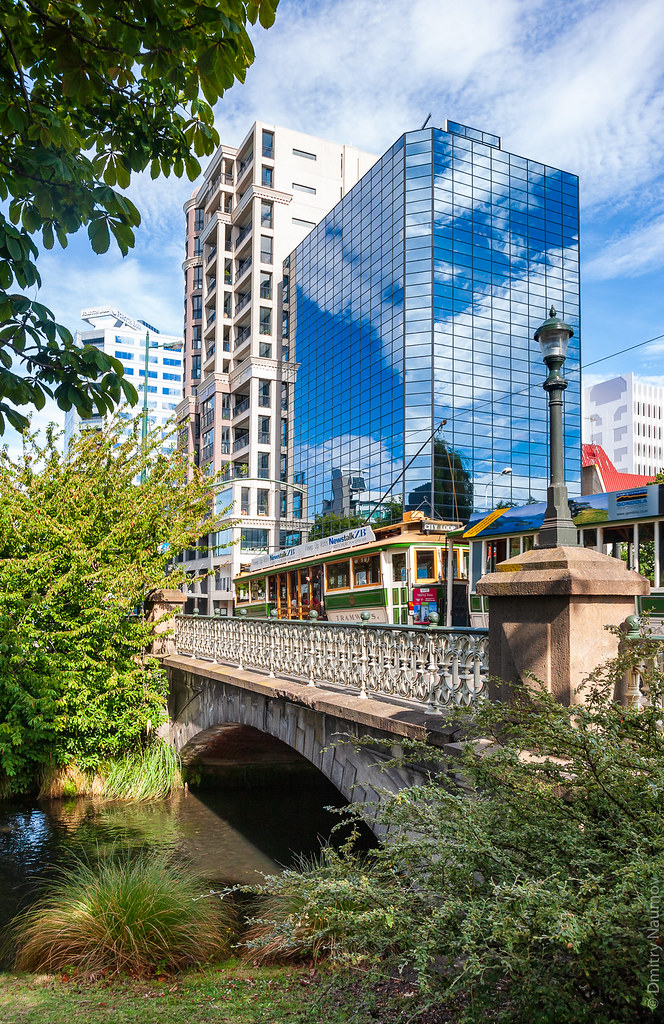

In [64]:
saved_sample_img = Image.open('46742194384_957c0be4db_b.jpg')
display(saved_sample_img)